In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=e5991e0e2af2297b604a7edd5d28e43873fe513c108c5721a6be879317fba86e
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<bound method Term.view of power[medium]>

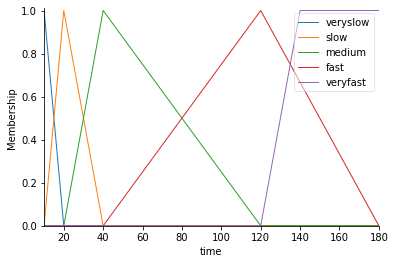

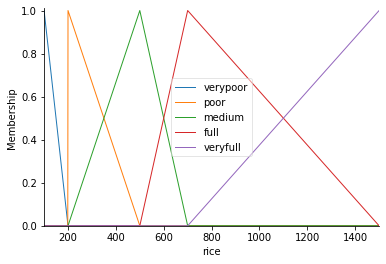

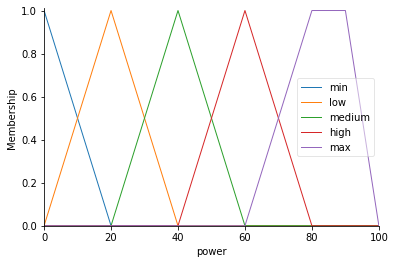

In [7]:
#Rice Cook
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time  = ctrl.Antecedent(np.arange(10,181,1), 'time')
rice  = ctrl.Antecedent(np.arange(100,1500,1),  'rice')

power = ctrl.Consequent(np.arange(0,101,1), 'power')

time['veryslow'] = fuzz.trimf(time.universe, [10,10,20])
time['slow']     = fuzz.trimf(time.universe, [10,20,40])
time['medium']   = fuzz.trimf(time.universe, [20,40,120])
time['fast']     = fuzz.trimf(time.universe, [40,120,180])
time['veryfast'] = fuzz.trapmf(time.universe,[120,140,180,180])

rice['verypoor'] = fuzz.trimf(rice.universe, [100, 100, 200])
rice['poor']     = fuzz.trimf(rice.universe, [200, 200, 500])
rice['medium']   = fuzz.trimf(rice.universe, [200, 500, 700])
rice['full']     = fuzz.trimf(rice.universe, [500, 700, 1500])
rice['veryfull'] = fuzz.trimf(rice.universe, [700, 1500,1500])

power['min']    = fuzz.trimf(power.universe, [0,0,20])
power['low']    = fuzz.trimf(power.universe, [0,20,40])
power['medium'] = fuzz.trimf(power.universe, [20,40,60])
power['high']   = fuzz.trimf(power.universe, [40,60,80])
power['max']    = fuzz.trapmf(power.universe, [60,80,90,100])

time.view()
rice.view()
power.view()
power['medium'].view

In [8]:
rule1  = ctrl.Rule(rice['verypoor']&time['veryslow'],power['min'])
rule2  = ctrl.Rule(rice['verypoor']&time['slow'],power['min'])
rule3  = ctrl.Rule(rice['verypoor']&time['medium'],power['min'])
rule4  = ctrl.Rule(rice['verypoor']&time['fast'],power['low'])
rule5  = ctrl.Rule(rice['verypoor']&time['veryfast'],power['low'])
rule6  = ctrl.Rule(rice['poor']&time['veryslow'],power['min'])
rule7  = ctrl.Rule(rice['poor']&time['slow'],power['min'])
rule8  = ctrl.Rule(rice['poor']&time['medium'],power['low'])
rule9  = ctrl.Rule(rice['poor']&time['fast'],power['low'])
rule10 = ctrl.Rule(rice['poor']&time['veryslow'],power['low'])
rule11 = ctrl.Rule(rice['medium']&time['veryslow'],power['low'])
rule12 = ctrl.Rule(rice['medium']&time['slow'],power['low'])
rule13 = ctrl.Rule(rice['medium']&time['medium'],power['medium'])
rule14 = ctrl.Rule(rice['medium']&time['fast'],power['high'])
rule15 = ctrl.Rule(rice['medium']&time['veryfast'],power['high'])
rule16 = ctrl.Rule(rice['full']&time['veryslow'],power['low'])
rule17 = ctrl.Rule(rice['full']&time['slow'],power['medium'])
rule18 = ctrl.Rule(rice['full']&time['medium'],power['medium'])
rule19 = ctrl.Rule(rice['full']&time['fast'],power['high'])
rule20 = ctrl.Rule(rice['full']&time['veryfast'],power['max'])
rule21 = ctrl.Rule(rice['veryfull']&time['veryslow'],power['medium'])
rule22 = ctrl.Rule(rice['veryfull']&time['slow'],power['medium'])
rule23 = ctrl.Rule(rice['veryfull']&time['medium'],power['high'])
rule24 = ctrl.Rule(rice['veryfull']&time['fast'],power['max'])
rule25 = ctrl.Rule(rice['veryfull']&time['veryfast'],power['max'])

6.666666666666667


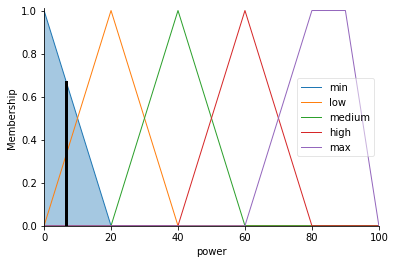

In [9]:
powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule2])

powering = ctrl.ControlSystemSimulation(powering_ctrl)

powering.input['rice']=100
powering.input['time']=20

powering.compute()
print(powering.output['power'])
power.view(sim=powering)